# In project I want to show you how I analize sales from supermarket with 3 different branch

The dataset I got from kaggle : https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

In [1]:
#setup the modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the data

supermarketSales = pd.read_csv('supermarket_sales - Sheet1.csv')
supermarketSales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
supermarketSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
# change the type of date column
supermarketSales['Date']=pd.to_datetime(supermarketSales['Date'])

In [5]:
# find the weekday form additional analysis in case I need this
supermarketSales['weekday']=supermarketSales['Date'].dt.day_name()

Counting unique value

In [6]:
#df.shape
supermarketSales.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
weekday                       7
dtype: int64

#### check for duplicated Invoice ID

In [7]:
supermarketSales[supermarketSales.duplicated(subset='Invoice ID')]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,weekday


#### Finding which branch have more sales

In [8]:
TotalPerBranch=supermarketSales.groupby('Branch')['Total'].sum()

Text(0.5, 1.0, 'Total Sales per branch')

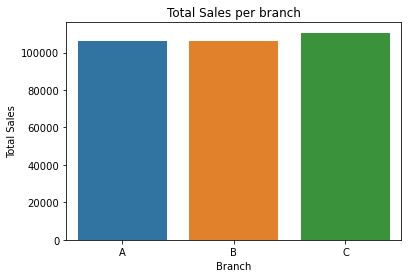

In [9]:
sns.barplot(x=TotalPerBranch.index , y=TotalPerBranch.values)
plt.ylabel('Total Sales')
plt.title('Total Sales per branch')

It's not much different in sales between the 3 branches

#### Finding is the membership give difference in sales in every branches

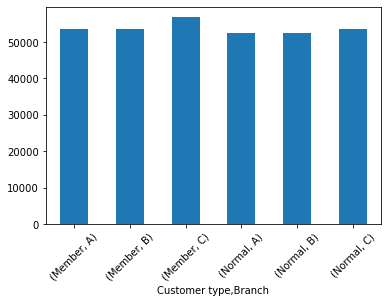

In [10]:
Totalpermembership=supermarketSales.groupby(['Customer type', 'Branch'])['Total'].sum().plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

The membership didn't give much difference either

#### How the customer pay their transactions

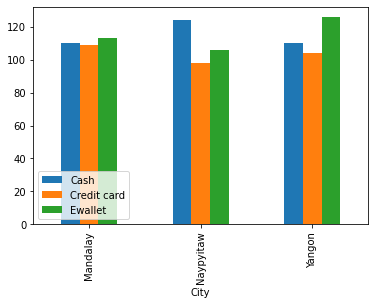

In [11]:
pd.crosstab(supermarketSales['City'],supermarketSales['Payment']).plot.bar()
plt.legend(loc='lower left')

Now, we could see a little difference. In Mandalay city, the amount of the way customer pay pretty similar and in Napyitaw city, customer tend to pay with cash. And in Yangon city, customer prefer e-wallet. It could be usefull for future campain

#### See the review from customer

C:\Users\zikhr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


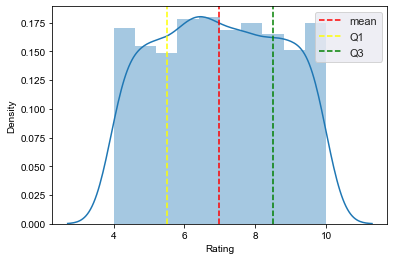

In [12]:
sns.distplot(supermarketSales['Rating'])
sns.set(rc={'figure.figsize':(20,10.27)})
plt.axvline(supermarketSales['Rating'].mean(),c='red', ls='--' , label='mean')
plt.axvline(np.percentile(supermarketSales['Rating'],25),c='yellow', ls='--' , label='Q1')
plt.axvline(np.percentile(supermarketSales['Rating'],75),c='green', ls='--' , label='Q3')
plt.legend(loc='upper right')
plt.show()

#### Finding about the gross income

Text(0.5, 1.0, 'Date')

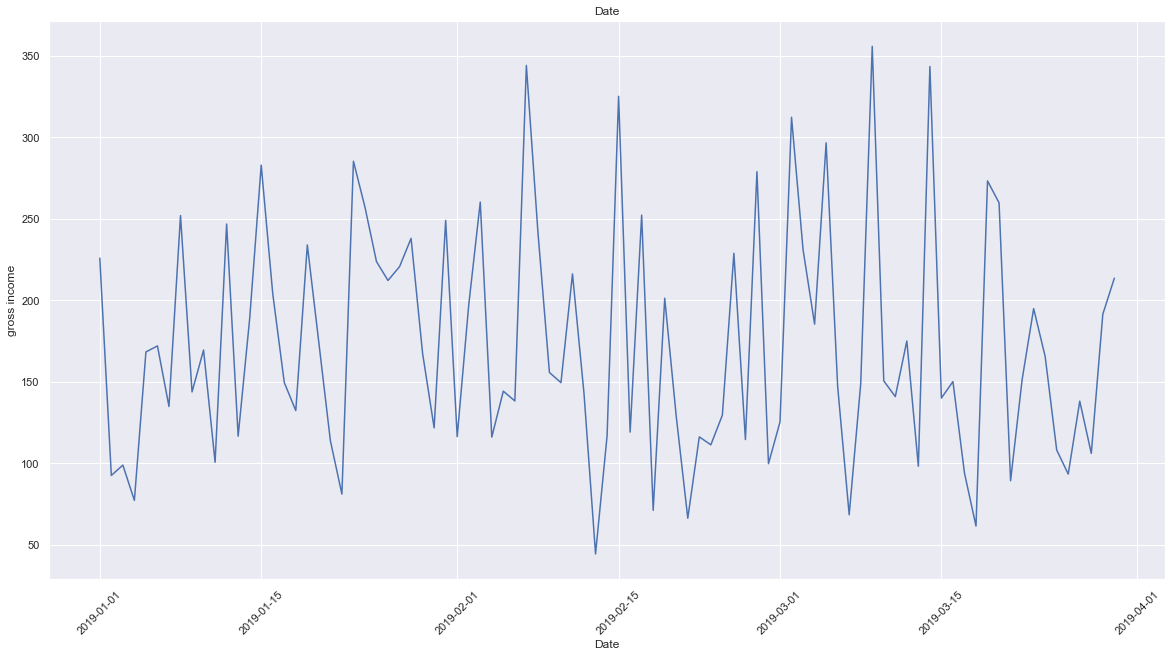

In [13]:
GrossOverDays=supermarketSales.groupby('Date')['gross income'].sum()
sns.lineplot(x=GrossOverDays.index , y=GrossOverDays.values)
plt.ylabel('gross income')
plt.xticks(rotation=45)
plt.title('Date')

From the line above, we couldn't tell specific trend. I try to find out in smaller scale later in different project

#### Which product generate more sales?

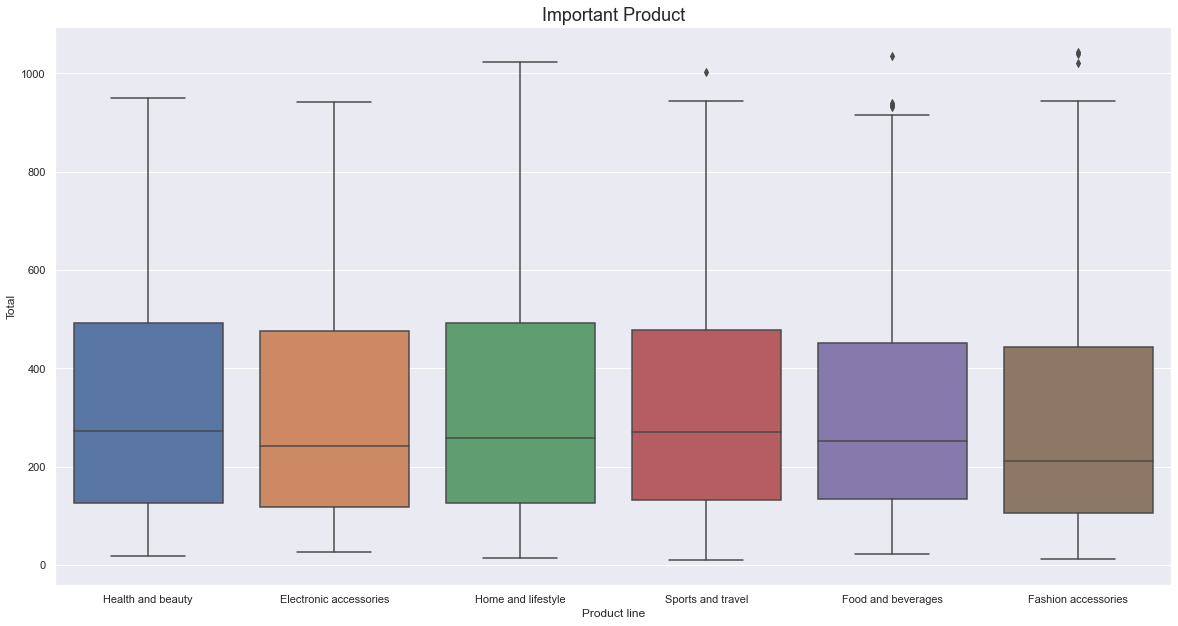

In [14]:
sns.boxplot(x="Product line", y="Total", data=supermarketSales);
plt.title('Important Product', fontsize=18)
sns.set(rc={'figure.figsize':(50,20.54)})

From this info, it will help the CRM/Marketing/Sales team what kind of campain that they need to do later on